In [1]:
import pandas as pd
import numpy as np
import sys

import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf

import SRRS
from SRRS import plotting

### Plotting random cells for Timp3 from either L6_IT or SMC to show peripheral differences

In [2]:
#first find the cell_ids that I'm interested in from the gene/cell output table
gene_cell_df = pd.read_csv('/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/outputs/gene_cell/MOp_peripheral_ReadZs_gene_ontology.csv')

gene_cell_df = gene_cell_df[
    gene_cell_df['ontology'].isin(['L6 IT','L2/3 IT','Sst']) &
    gene_cell_df['gene'].eq('Timp3') &
    gene_cell_df['num_spots'].ge(0) #NOTE
]
gene_cell_df['mouse_sample'] = 'mouse'+gene_cell_df['mouse'].astype(str)+'sample'+gene_cell_df['sample'].astype(str)+'.hdf5'
#gene_cell_df = gene_cell_df[['cell_id','ontology','score','variance','mouse_sample']]
gene_cell_df

,metric,cell_id,num_spots,gene,num_gene_spots,median_rank,score,variance,mouse,sample,replicate,sample_id,ontology,mouse_sample
11066,peripheral,111224926392630212160278934965632123769,1175,Timp3,16,731.5,-0.244463,0.051707,2,4,1,m2s4,Sst,mouse2sample4.hdf5
12505,peripheral,112648164421818832458832345016894387743,1017,Timp3,6,349.5,0.313976,0.106825,2,4,1,m2s4,Sst,mouse2sample4.hdf5
23358,peripheral,123723356376229754610115939505968724825,1192,Timp3,10,657.5,-0.102435,0.075311,2,4,1,m2s4,Sst,mouse2sample4.hdf5
27689,peripheral,128381636856795264741722839450584141509,689,Timp3,5,441.0,-0.279070,0.142439,2,4,1,m2s4,L2/3 IT,mouse2sample4.hdf5
34369,peripheral,136717447085671937120241694290555474406,545,Timp3,9,354.0,-0.297794,0.089902,2,4,1,m2s4,Sst,mouse2sample4.hdf5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504180,peripheral,55824625741938588634687216110989015160,1129,Timp3,24,592.5,-0.048759,0.036234,1,5,1,m1s5,Sst,mouse1sample5.hdf5
3510519,peripheral,6043178046984074953134207573372326917,617,Timp3,15,176.0,0.431818,0.057673,1,5,1,m1s5,Sst,mouse1sample5.hdf5
3512149,peripheral,61663256578270467796366138864714040808,938,Timp3,10,353.5,0.247599,0.075190,1,5,1,m1s5,Sst,mouse1sample5.hdf5
3518925,peripheral,67162672766033638423365508669814880063,825,Timp3,15,542.0,-0.313107,0.057964,1,5,1,m1s5,Sst,mouse1sample5.hdf5


In [3]:
gene_cell_df['ontology'].value_counts()

Sst        484
L2/3 IT    117
L6 IT       74
Name: ontology, dtype: int64

In [4]:
gene_cell_df.groupby('ontology')['score'].mean()

ontology
L2/3 IT    0.361534
L6 IT      0.341006
Sst        0.052397
Name: score, dtype: float64

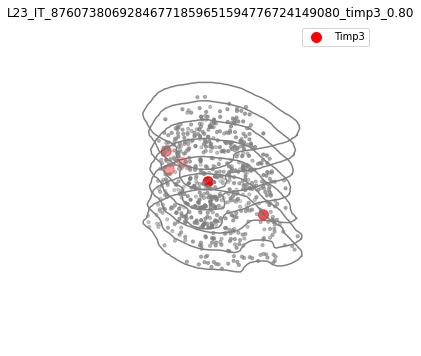

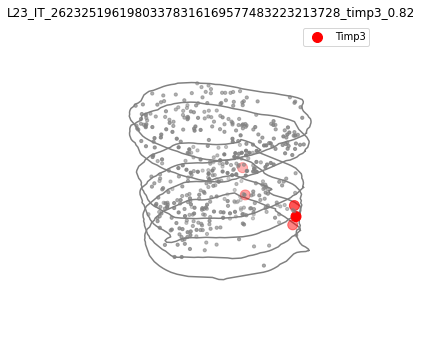

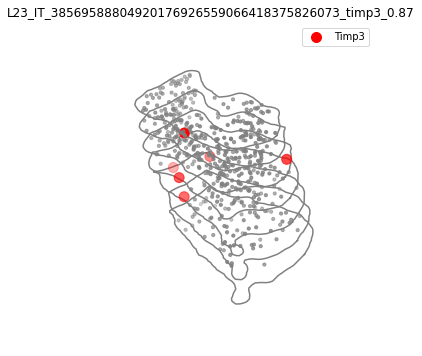

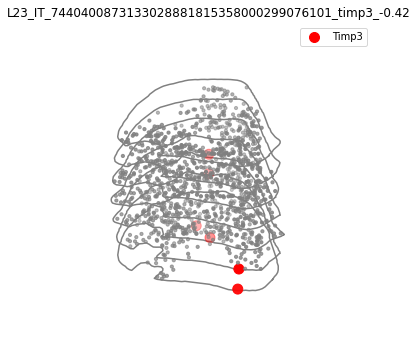

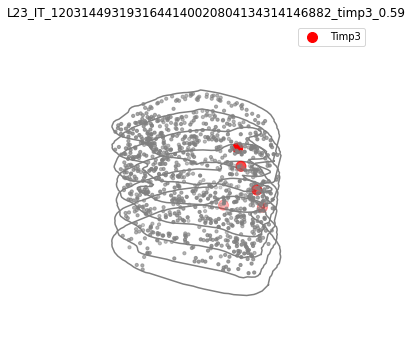

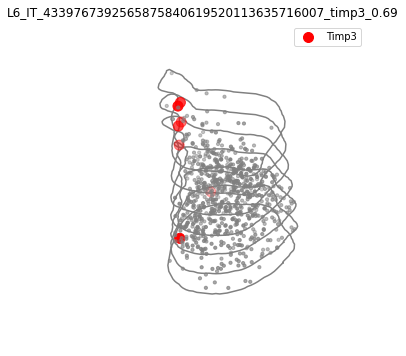

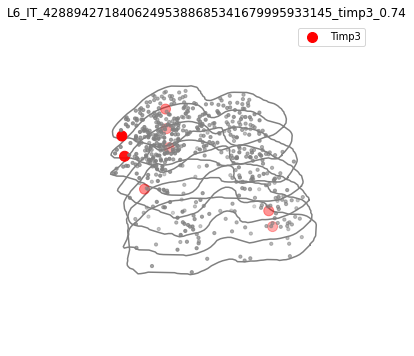

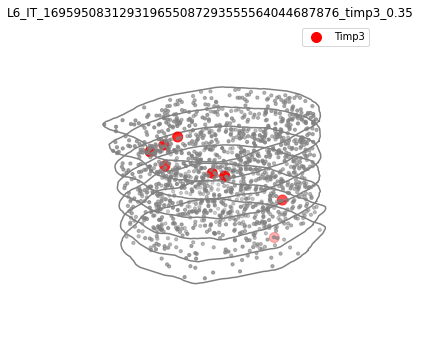

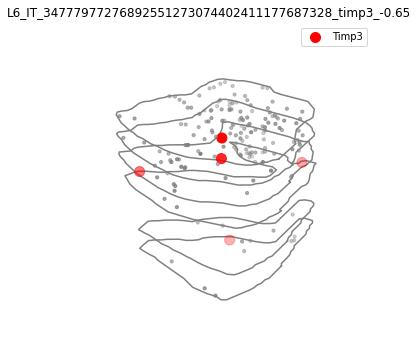

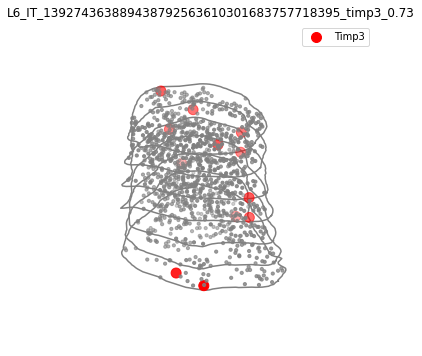

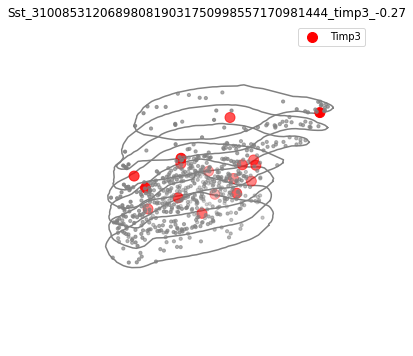

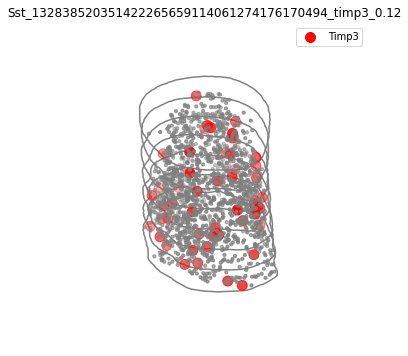

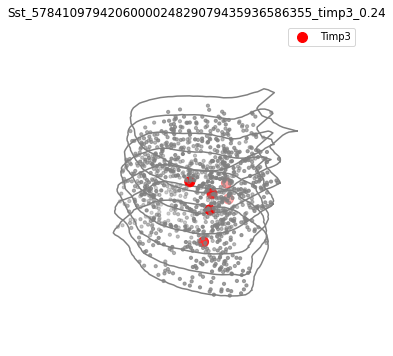

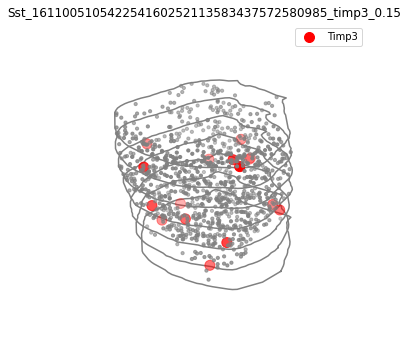

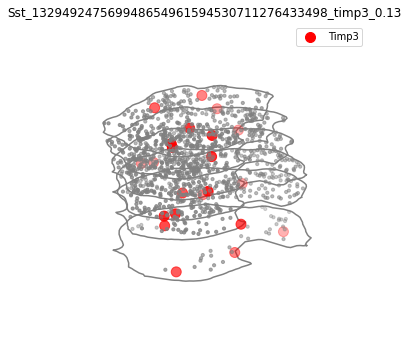

In [5]:
#Plot random cells from different ontologies, highlighting Timp3 spots in red
n_plots = 5
np.random.seed(1) #for reproducibility

for ont,g in gene_cell_df.groupby('ontology'):
    ont = ont.replace(' ','_').replace('/','')

    pdf = matplotlib.backends.backend_pdf.PdfPages('Timp3_{}_3d_cells.pdf'.format(ont))

    stem = '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/inputs/hdf5s/BICCN_'
    for i,r in g.sample(n_plots).iterrows():
        sample = SRRS.HDF5(stem+r['mouse_sample'])
        cell = sample.get_cells_by_id([r['cell_id']])[0]

        fmts = [
            r['ontology'].replace('/','').replace(' ','_'),
            r['cell_id'],
            'timp3',
            '{:.2f}'.format(r['score']),
        ]

        fig,axs = plotting.plot_cell_3D(cell,gene_colors={'Timp3':'red'})
        plt.title('{}_{}_{}_{}'.format(*fmts))
        pdf.savefig()
        plt.show(fig)
        plt.close()

    pdf.close()

# Plotting Flt1 random cells between VLMC and L5 IT to see any differences

In [6]:
#first find the cell_ids that I'm interested in from the gene/cell output table
gene_cell_df = pd.read_csv('/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/outputs/gene_cell/MOp_peripheral_ReadZs_gene_ontology.csv')

gene_cell_df = gene_cell_df[
    gene_cell_df['ontology'].isin(['L5 IT','VLMC']) &
    gene_cell_df['gene'].eq('Flt1') &
    gene_cell_df['num_spots'].ge(500) #want visually "dense" cells for plotting
]
gene_cell_df['mouse_sample'] = 'mouse'+gene_cell_df['mouse'].astype(str)+'sample'+gene_cell_df['sample'].astype(str)+'.hdf5'
#gene_cell_df = gene_cell_df[['cell_id','ontology','score','variance','mouse_sample']]
gene_cell_df

,metric,cell_id,num_spots,gene,num_gene_spots,median_rank,score,variance,mouse,sample,replicate,sample_id,ontology,mouse_sample
12147,peripheral,112241079216048970646177567296849637529,592,Flt1,6,133.5,0.551607,0.106596,2,4,1,m2s4,VLMC,mouse2sample4.hdf5
48876,peripheral,151474480921610008843828817099193350551,733,Flt1,6,500.0,-0.363388,0.106702,2,4,1,m2s4,VLMC,mouse2sample4.hdf5
93173,peripheral,196562005419384853973911661121158467890,529,Flt1,7,158.0,0.405303,0.110265,2,4,1,m2s4,VLMC,mouse2sample4.hdf5
96321,peripheral,199383595679567987493829043882696237917,521,Flt1,19,212.0,0.188462,0.046148,2,4,1,m2s4,VLMC,mouse2sample4.hdf5
131708,peripheral,234426466227798799713824883806619900845,590,Flt1,33,459.0,-0.555178,0.027111,2,4,1,m2s4,VLMC,mouse2sample4.hdf5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3493752,peripheral,48636629648091737083598638297192913992,732,Flt1,8,256.0,0.302326,0.088279,1,5,1,m1s5,VLMC,mouse1sample5.hdf5
3542827,peripheral,84160524639246723749372393954042621628,506,Flt1,5,148.0,0.417822,0.142287,1,5,1,m1s5,VLMC,mouse1sample5.hdf5
3542944,peripheral,84258051624625387623325703672384503109,511,Flt1,10,248.5,0.029412,0.074713,1,5,1,m1s5,VLMC,mouse1sample5.hdf5
3557053,peripheral,94194155471532350639433658067223319504,1271,Flt1,12,579.5,0.088976,0.065466,1,5,1,m1s5,VLMC,mouse1sample5.hdf5


In [7]:
gene_cell_df['ontology'].value_counts()

VLMC     162
L5 IT     40
Name: ontology, dtype: int64

In [8]:
gene_cell_df.groupby('ontology')['score'].mean()

ontology
L5 IT    0.483821
VLMC     0.052682
Name: score, dtype: float64

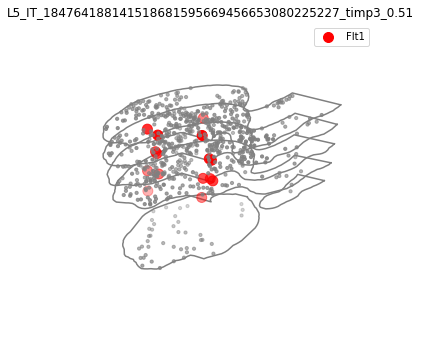

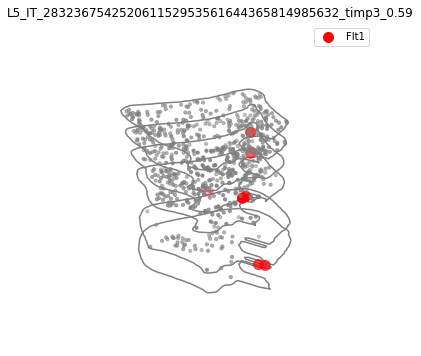

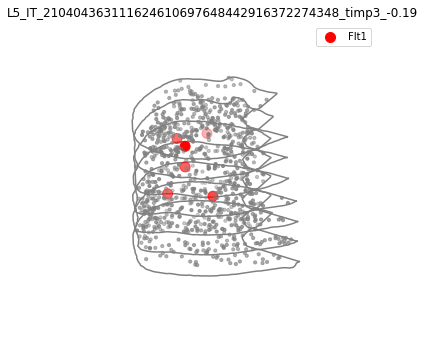

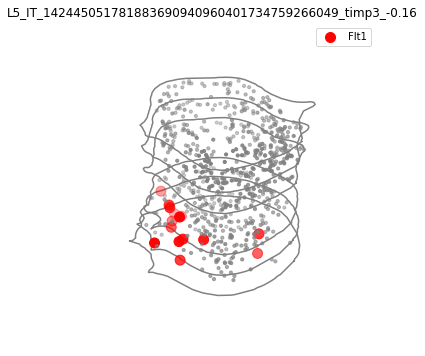

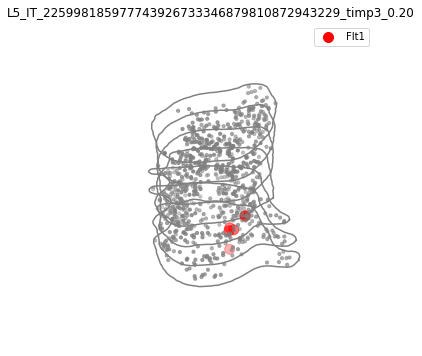

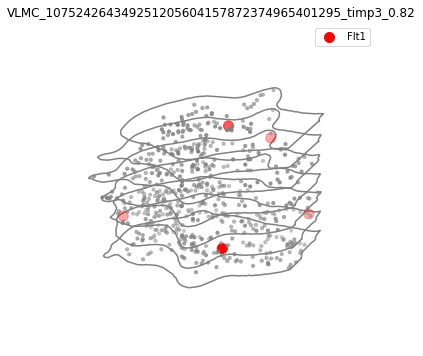

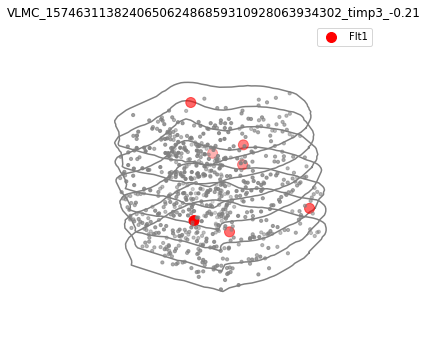

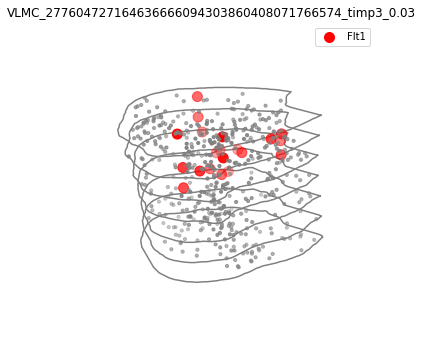

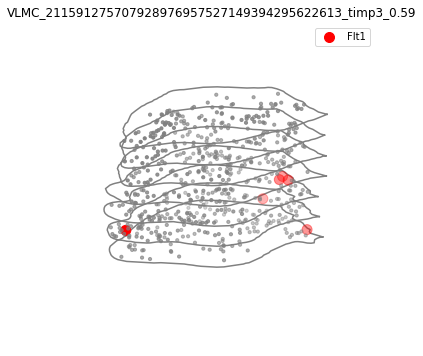

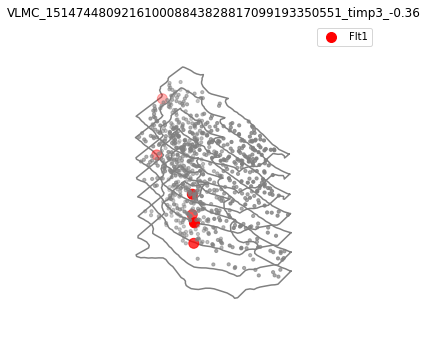

In [9]:
#Plot random cells from different ontologies, highlighting Flt1 spots in red
n_plots = 5
np.random.seed(1) #for reproducibility

for ont,g in gene_cell_df.groupby('ontology'):
    ont = ont.replace(' ','_').replace('/','')

    pdf = matplotlib.backends.backend_pdf.PdfPages('Flt1_{}_3d_cells.pdf'.format(ont))

    stem = '/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/inputs/hdf5s/BICCN_'
    for i,r in g.sample(n_plots).iterrows():
        sample = SRRS.HDF5(stem+r['mouse_sample'])
        cell = sample.get_cells_by_id([r['cell_id']])[0]

        fmts = [
            r['ontology'].replace('/','').replace(' ','_'),
            r['cell_id'],
            'timp3',
            '{:.2f}'.format(r['score']),
        ]

        fig,axs = plotting.plot_cell_3D(cell,gene_colors={'Flt1':'red'})
        plt.title('{}_{}_{}_{}'.format(*fmts))
        pdf.savefig()
        plt.show(fig)
        plt.close()

    pdf.close()